In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [2]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [5]:
amnt = ['100', '1000', '10000']
reset_freq = ['100', '1000', '10000']
prefix = '../cva_sine_result_files/finalreset_'
suffix = '_40_0_1.pkl'

loggers = {}
for i in reset_freq:
    loggers[i] = {}
    for j in amnt:
        loggers[i][j] = get_logger(prefix+i+'_'+j+suffix)

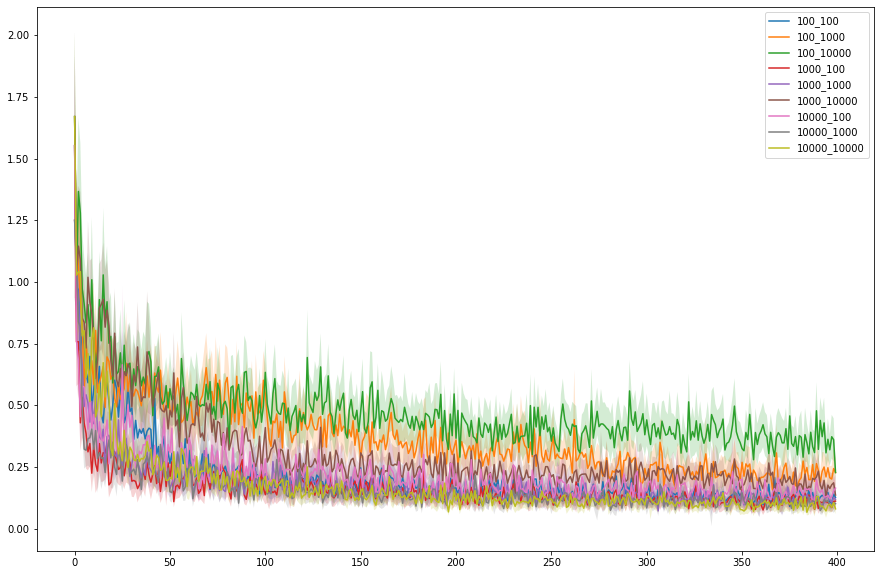

In [7]:
# plot the performance of everything
alpha = 0.2
for i, l in loggers.items():
    for j, logger in l.items():
        x = [j for j in range(len(logger.test_loss))]
        plt.plot(x, logger.test_loss, label=i+'_'+j)
        plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,10)
# plt.ylim(0,.5)
plt.show()

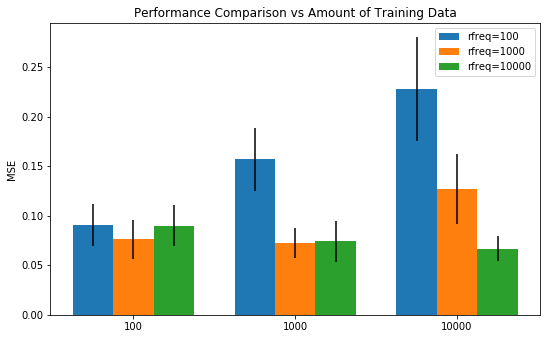

In [12]:
cva_mins, cva_stds, cavia_mins, cavia_stds, maml_mins, maml_stds = [], [], [], [], [], []
for amn in amnt:
    idx = np.argmin(loggers['100'][amn].test_loss)
    cva_mins.append(loggers['100'][amn].test_loss[idx])
    cva_stds.append(loggers['100'][amn].test_conf[idx])
    idx = np.argmin(loggers['1000'][amn].test_loss)
    cavia_mins.append(loggers['1000'][amn].test_loss[idx])
    cavia_stds.append(loggers['1000'][amn].test_conf[idx])
    idx = np.argmin(loggers['10000'][amn].test_loss)
    maml_mins.append(loggers['10000'][amn].test_loss[idx])
    maml_stds.append(loggers['10000'][amn].test_conf[idx])

xlabels = amnt
x = np.arange(len(xlabels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, cva_mins, width, label='rfreq=100', yerr=cva_stds)
rects2 = ax.bar(x, cavia_mins, width, label='rfreq=1000', yerr=cavia_stds)
rects3 = ax.bar(x+width, maml_mins, width, label='rfreq=10000', yerr=maml_stds)
ax.set_ylabel('MSE')
ax.set_title('Performance Comparison vs Amount of Training Data')
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.legend() 
# plt.ylim(0, 1)

fig.tight_layout()

fig = plt.gcf()
fig.set_size_inches(8,5)

plt.show() 